### Project 2: 
#### Task 3: Sentiment Analysis on IMDB Reviews using LSTM and Keras - Hamed Ahmadinia

In [1]:
# importing required packages such as pandas, numpy, corpus, stopwords, ...

import pandas as pd    # to load dataset
import numpy as np     # for mathematic equation
from nltk.corpus import stopwords   # to get collection of stopwords
from sklearn.model_selection import train_test_split       # for splitting dataset
from tensorflow.keras.preprocessing.text import Tokenizer  # to encode text to int
from tensorflow.keras.preprocessing.sequence import pad_sequences   # to do padding or truncating
from tensorflow.keras.models import Sequential     # the model
from tensorflow.keras.layers import Embedding, LSTM, Dense # layers of the architecture
from tensorflow.keras.callbacks import ModelCheckpoint   # save model
from tensorflow.keras.models import load_model   # load saved model
import re

In [2]:
# now we are previewing our dataset
# we used notebooks.fi for running our assignments

data = pd.read_csv('IMDB Dataset.csv')

print(data)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


In [3]:
# importing NLTK which comes with many corpora. here we import the nltk library for our further operations.
# using "nltk.download('stopwords')" command we will be able to Download stopwords from NLTK library
# "Stop Word" is a commonly used words in a sentence, usually a search engine is programmed to ignore this words (i.e. "the", "a", "an", "of", etc.)

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mostafaoraei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# we declare english stop words

english_stops = set(stopwords.words('english'))

In [5]:
# checking english_stops

english_stops

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [6]:
# Now we need to load and clean our dataset
# removing html tags, numbers, uppercase, and punctuations.
# After that, we also encode the sentiments into integers (0 and 1).
# Where 0 is for negative sentiments and 1 is for positive sentiments.

def load_dataset():
    df = pd.read_csv('IMDB Dataset.csv')
    x_data = df['review']       # Reviews/Input
    y_data = df['sentiment']    # Sentiment/Output

    # PRE-PROCESS REVIEW
    x_data = x_data.replace({'<.*?>': ''}, regex = True)          # remove html tag
    x_data = x_data.replace({'[^A-Za-z]': ' '}, regex = True)     # remove non alphabet
    x_data = x_data.apply(lambda review: [w for w in review.split() if w not in english_stops])  # remove stop words
    x_data = x_data.apply(lambda review: [w.lower() for w in review])   # lower case
    
    # ENCODE SENTIMENT -> 0 & 1
    y_data = y_data.replace('positive', 1)
    y_data = y_data.replace('negative', 0)

    return x_data, y_data

x_data, y_data = load_dataset()

print('Reviews')
print(x_data, '\n')
print('Sentiment')
print(y_data)

Reviews
0        [one, reviewers, mentioned, watching, oz, epis...
1        [a, wonderful, little, production, the, filmin...
2        [i, thought, wonderful, way, spend, time, hot,...
3        [basically, family, little, boy, jake, thinks,...
4        [petter, mattei, love, time, money, visually, ...
                               ...                        
49995    [i, thought, movie, right, good, job, it, crea...
49996    [bad, plot, bad, dialogue, bad, acting, idioti...
49997    [i, catholic, taught, parochial, elementary, s...
49998    [i, going, disagree, previous, comment, side, ...
49999    [no, one, expects, star, trek, movies, high, a...
Name: review, Length: 50000, dtype: object 

Sentiment
0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64


In [7]:
# Split data set into 80% of Training and 20% of Testing set using "train_test_split" method from Scikit-Learn.
# Checking Test and traning sets

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)

print('Train Set')
print(x_train, '\n')
print(x_test, '\n')
print('Test Set')
print(y_train, '\n')
print(y_test)

Train Set
35380    [i, downloaded, movie, yesterday, internet, si...
19850    [movies, like, need, sequels, part, advantage,...
42505    [routine, suspense, yarn, sociopath, dillon, g...
14759    [i, love, way, game, make, literally, jump, se...
46800    [a, family, terrible, people, must, remain, ho...
                               ...                        
39830    [i, understand, anytime, someone, show, one, l...
38202    [why, films, especially, american, like, meatb...
22877    [for, like, stand, comedians, must, heard, geo...
8605     [after, seeing, film, months, ago, keeps, jump...
11891    [what, say, grainy, poorly, filmed, mm, stag, ...
Name: review, Length: 40000, dtype: object 

49719    [i, absolutely, adore, film, lady, columnist, ...
47387    [wealthy, horse, ranchers, buenos, aires, long...
30494    [this, movie, sucked, plain, simple, okay, bas...
31487    [take, famous, play, director, ideas, using, c...
17230    [i, impressed, story, it, typical, predatory, ...
 

In [8]:
# defining a function to have maximum review length.
# here we calculate the mean of all reviews length

def get_max_length():
    review_length = []
    for review in x_train:
        review_length.append(len(review))

    return int(np.ceil(np.mean(review_length)))

<hr>

### Tokenize and Pad/Truncate Reviews
A Neural Network only accepts numeric data, so we need to encode the reviews. I use <b>tensorflow.keras.preprocessing.text.Tokenizer</b> to encode the reviews into integers, where each unique word is automatically indexed (using <b>fit_on_texts</b> method) based on <b>x_train</b>. <br>
<b>x_train</b> and <b>x_test</b> is converted into integers using <b>texts_to_sequences</b> method.

Each reviews has a different length, so we need to add padding (by adding 0) or truncating the words to the same length (in this case, it is the mean of all reviews length) using <b>tensorflow.keras.preprocessing.sequence.pad_sequences</b>.


<b>post</b>, pad or truncate the words in the back of a sentence<br>
<b>pre</b>, pad or truncate the words in front of a sentence

In [9]:
# in Neural Network we can use only numeric data, that is why we need to encode the reviews.
# we encode the reviews into integers, where each unique word is automatically indexed based on x_train.
# converting x_train and x_test into integers is the next step.

token = Tokenizer(lower=False)  
token.fit_on_texts(x_train)
x_train = token.texts_to_sequences(x_train)
x_test = token.texts_to_sequences(x_test)

max_length = get_max_length()

x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

total_words = len(token.word_index) + 1   # add 1 because of 0 padding

print('Encoded X Train\n', x_train, '\n')
print('Encoded X Test\n', x_test, '\n')
print('Maximum review length: ', max_length)

Encoded X Train
 [[    1 18147     3 ...     0     0     0]
 [   28     6   266 ...     0     0     0]
 [ 2428   652  9013 ...     0     0     0]
 ...
 [  206     6   676 ...     0     0     0]
 [  306   222     4 ...  4891    35     1]
 [  105    57  5297 ...     0     0     0]] 

Encoded X Test
 [[    1   329  6067 ...     0     0     0]
 [ 2890  1579 19742 ...     0     0     0]
 [    8     3  1973 ...     0     0     0]
 ...
 [    1     5    31 ...     0     0     0]
 [  217   257     1 ...     0     0     0]
 [    1    99  8571 ...     0     0     0]] 

Maximum review length:  130


In [10]:
# now we bulilt Architecture/Model

# Embedding size for each token
# Embedding Layer creates word vectors of each word in the <i>word_index</i> and group words that are related or have similar meaning by analyzing other words around them

EMBED_DIM = 32 

# Long Short-Term Memory layer = LSTM
# to make a decision to keep or throw away data by considering the current input, previous output, and previous memory. There are some important components in LSTM

LSTM_OUT = 64

# The Sequential model
model = Sequential()
model.add(Embedding(total_words, EMBED_DIM, input_length = max_length))
model.add(LSTM(LSTM_OUT))

# Dense Layer: compute the input with the weight matrix and bias (optional), and using an activation function. I use Sigmoid activation function for this work because the output is only 0 or 1.

model.add(Dense(1, activation='sigmoid'))

# The optimizer is Adam and the loss function is Binary Crossentropy because again the output is only 0 and 1, which is a binary number.
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# checking our model 
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 130, 32)           2953824   
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 2,978,721
Trainable params: 2,978,721
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
# ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval.
# so the model or weights can be loaded later to continue the training from the state saved.

checkpoint = ModelCheckpoint(
    'models/LSTM.h5',
    monitor='accuracy',
    save_best_only=True,
    verbose=1
)

In [12]:
# now, we train the model for 5 epochs, in batches of 128 samples,on data stored in the Numpy array X_train,and labels stored in the Numpy array y_train.
# we used callback called checkpoint to save the model locally for every epoch if its accuracy improved from the previous epoch.

model.fit(x_train, y_train, batch_size = 128, epochs = 5, callbacks=[checkpoint])

Epoch 1/5
313/313 [==============================] - ETA: 0s - loss: 0.4537 - accuracy: 0.7579
Epoch 1: accuracy improved from -inf to 0.75788, saving model to models/LSTM.h5
313/313 [==============================] - 56s 171ms/step - loss: 0.4537 - accuracy: 0.7579
Epoch 2/5
313/313 [==============================] - ETA: 0s - loss: 0.2027 - accuracy: 0.9274
Epoch 2: accuracy improved from 0.75788 to 0.92743, saving model to models/LSTM.h5
313/313 [==============================] - 54s 174ms/step - loss: 0.2027 - accuracy: 0.9274
Epoch 3/5
313/313 [==============================] - ETA: 0s - loss: 0.1209 - accuracy: 0.9628
Epoch 3: accuracy improved from 0.92743 to 0.96283, saving model to models/LSTM.h5
313/313 [==============================] - 53s 169ms/step - loss: 0.1209 - accuracy: 0.9628
Epoch 4/5
313/313 [==============================] - ETA: 0s - loss: 0.0844 - accuracy: 0.9751
Epoch 4: accuracy improved from 0.96283 to 0.97508, saving model to models/LSTM.h5
313/313 [======

In [13]:
# now we need to test efficency of our model.
# predicting the sentiment using our x_test data and comparing the predictions with y_test data as expected output

y_pred = (model.predict(x_test) > 0.5).astype("int32")

true = 0
for i, y in enumerate(y_test):
    if y == y_pred[i]:
        true += 1

print('Correct Prediction: {}'.format(true))
print('Wrong Prediction: {}'.format(len(y_pred) - true))
print('Accuracy: {}'.format(true/len(y_pred)*100))
print("The accuracy of our model is very good!")

Correct Prediction: 8653
Wrong Prediction: 1347
Accuracy: 86.53


In [14]:
# now, we load saved model and use it to predict a movie review statement's sentiment (positive or negative).

loaded_model = load_model('models/LSTM.h5')

In [15]:
# iloc() function enables us to select a particular cell of the dataset.
# it helps us select a value that belongs to a particular row or column from a set of values of a data frame or dataset.
# checking a review as an input to be predicted

data.iloc[0,:]

review       One of the other reviewers has mentioned that ...
sentiment                                             positive
Name: 0, dtype: object

In [16]:
# checking the review of a movie

review = str(input('Movie Review: '))

Movie Review: Bad plot, bad dialogue, bad acting, idiotic


In [21]:
# The input must be pre processed before it is passed to the model to be predicted
# re. compile() method: We can combine a regular expression pattern into pattern objects, which can be used for pattern matching. 
# It also helps to search a pattern again without rewriting it.

regex = re.compile(r'[^a-zA-Z\s]')
review = regex.sub('', review)
print('Cleaned: ', review)

words = review.split(' ')
filtered = [w for w in words if w not in english_stops]
filtered = ' '.join(filtered)
filtered = [filtered.lower()]

print('Filtered: ', filtered)

Cleaned:  Bad plot bad dialogue bad acting idiotic
Filtered:  ['bad plot bad dialogue bad acting idiotic']


In [22]:
# again, Once again, we need to tokenize and encode the words.
# we used the tokenizer which was previously declared because we want to encode the words based on words that are known by the model.

tokenize_words = token.texts_to_sequences(filtered)
tokenize_words = pad_sequences(tokenize_words, maxlen=max_length, padding='post', truncating='post')

# checking tokenize_words
print(tokenize_words)

[[  18   41   18  315   18   44 2883    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]]


In [23]:
# checking confidence score of the review statement

result = loaded_model.predict(tokenize_words)
print("confidence score of the review statement", result)

[[0.00288785]]


In [24]:
# If the confidence score is close to 0, then the statement is negative. 
# if the confidence score is close to 1, then the statement is positive.
# we used a threshold of 0.7 to determine which confidence score is positive and negative.
# so if it is equal or greater than 0.7, it is positive and if it is less than 0.7, it is negative.

if result >= 0.7:
    print('positive')
else:
    print('negative')

negative


## Building a Recurrent Neural Network

In [42]:
# importing required packages

from keras.layers import Input, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras.layers import Convolution1D
from keras import initializers, regularizers, constraints, optimizers, layers

# Set embed_size to 128, which is the embedding size of each word

embed_size = 128

next_model = Sequential()
next_model.add(Embedding(total_words, embed_size, input_length = max_length))
next_model.add(Bidirectional(LSTM(32, return_sequences = True)))
next_model.add(GlobalMaxPool1D())
next_model.add(Dense(20, activation="relu"))
next_model.add(Dropout(0.05))
next_model.add(Dense(1, activation="sigmoid"))
next_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# setting number of batch as 100
# The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters.

batch_size = 100

# setting number of epochs to 10
# The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.

epochs = 10

# fitting next model
next_model_history = next_model.fit(x_train,y_train, validation_data = (x_test, y_test), batch_size=batch_size, epochs=epochs)


Epoch 1/10
400/400 [==============================] - 125s 304ms/step - loss: 0.3713 - accuracy: 0.8307 - val_loss: 0.2907 - val_accuracy: 0.8771
Epoch 2/10
400/400 [==============================] - 119s 297ms/step - loss: 0.1569 - accuracy: 0.9433 - val_loss: 0.3035 - val_accuracy: 0.8812
Epoch 3/10
400/400 [==============================] - 121s 303ms/step - loss: 0.0667 - accuracy: 0.9791 - val_loss: 0.3873 - val_accuracy: 0.8739
Epoch 4/10
400/400 [==============================] - 152s 379ms/step - loss: 0.0320 - accuracy: 0.9899 - val_loss: 0.4988 - val_accuracy: 0.8712
Epoch 5/10
400/400 [==============================] - 144s 360ms/step - loss: 0.0158 - accuracy: 0.9949 - val_loss: 0.6777 - val_accuracy: 0.8619
Epoch 6/10
400/400 [==============================] - 140s 350ms/step - loss: 0.0170 - accuracy: 0.9945 - val_loss: 0.5975 - val_accuracy: 0.8628
Epoch 7/10
400/400 [==============================] - 144s 359ms/step - loss: 0.0146 - accuracy: 0.9954 - val_loss: 0.7115 -

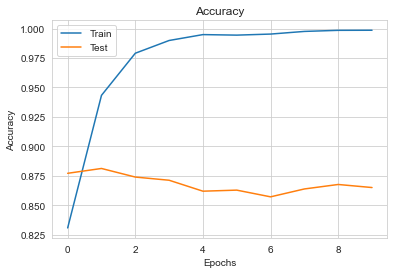

In [43]:
# importing matplotlip for visualizing
import matplotlib.pyplot as plt

# Generating a new figure
plt.figure()

# summarize history for accuracy along with traning
plt.plot(next_model_history.history["accuracy"], label = "Train")

# summarize history for val_accuracy along with test
plt.plot(next_model_history.history["val_accuracy"], label = "Test")

# setting plot title
plt.title("Accuracy")

# setting plot ylable
plt.ylabel("Accuracy")

# setting plot xlable
plt.xlabel("Epochs")

# Placing a legend on the Axes
plt.legend()

# Display all open figures
plt.show()

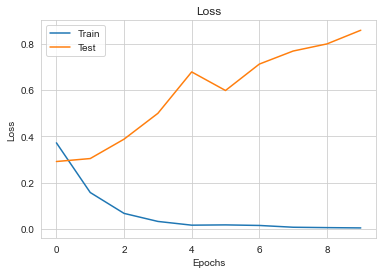

In [44]:
# Generating a new figure
plt.figure()

# summarize history for loss along with traning
plt.plot(next_model_history.history["loss"], label = "Train")

# summarize history for val_loss along with test
plt.plot(next_model_history.history["val_loss"], label = "Test")

# setting plot title
plt.title("Loss")

# setting plot ylabble
plt.ylabel("Loss")

# setting plot xlable
plt.xlabel("Epochs")

# Placing a legend on the Axes
plt.legend()

# Display all open figures
plt.show()

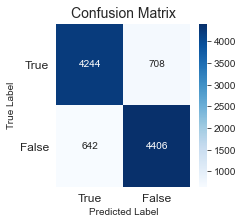

True Positive: 4244
True Negative: 4406
False Positive: 708
False Negative: 642


In [45]:
# Seaborn is a Python data visualization library built on top of Matplotlib.
# The import seaborn portion of the code tells Python to bring the Seaborn library into your current environment.

import seaborn as sns

# we used whitegrid theme which is better suited to plots with heavy data elements.
sns.set_style("whitegrid")

# Compute confusion matrix to evaluate the accuracy of a classification.
from sklearn.metrics import confusion_matrix

# Create a confusion matrix with scikit-learn
y_pred = next_model.predict(x_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test,y_pred)

df1 = pd.DataFrame(columns=["True","False"], index= ["True","False"], data= cm ) 

# setting subplots, figure size
f,ax = plt.subplots(figsize=(3,3))

# Ploting rectangular data as a color-encoded matrix.
sns.heatmap(df1, annot=True,cmap="Blues", fmt= '.0f',ax=ax

# setting plot xlable            
plt.xlabel("Predicted Label")

# setting fontsize for xticks           
plt.xticks(size = 12)

# setting fontsize for yticks                       
plt.yticks(size = 12, rotation = 0)
            
# setting plot ylable            
plt.ylabel("True Label")

# setting plot title            
plt.title("Confusion Matrix", size = 14)
            
# showing plot            
plt.show()

print ("True Positive:" , (cm[0,0]))
print ("True Negative:" , (cm[1,1]))
print ("False Positive:" , (cm[0,1]))
print ("False Negative:" , (cm[1,0]))

In [46]:
# checking correct and wrong predections and checking accuracy

y_pred = (next_model.predict(x_test) > 0.5).astype("int32")

true = 0
for i, y in enumerate(y_test):
    if y == y_pred[i]:
        true += 1

print('Correct Prediction: {}'.format(true))
print('Wrong Prediction: {}'.format(len(y_pred) - true))
print('Accuracy: {}'.format(true/len(y_pred)*100))

Correct Prediction: 8650
Wrong Prediction: 1350
Accuracy: 86.5
